In [2]:
import pandas as pd

# Load dataset
dataset_path = "../data/processed/complete_dataset.csv"
df = pd.read_csv(dataset_path)

# Display shape and column types
print("Dataset shape:", df.shape)
print("\nData types summary:")
print(df.dtypes.value_counts())

# Check for missing values
print("\nMissing values per column (top 10):")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing.head(10) if not missing.empty else "No missing values.")

# Count emission class distribution
print("\nEmission class distribution:")
print(df['Emission_Point'].value_counts())

# Show a preview of the data
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (234917, 338)

Data types summary:
object     334
int64        2
float64      2
Name: count, dtype: int64

Missing values per column (top 10):


Time    1
dtype: int64


Emission class distribution:
Emission_Point
E2    81162
E1    81157
E3    72598
Name: count, dtype: int64

First 5 rows:


,Time,PartMatter01,PartMatter02,PartMatter03,PartMatter04,PartMatter05,PartMatter06,PartMatter07,PartMatter08,PartMatter09,...,PM1-Density-L53z2,PM1-Density-L54z2,PM1-Density-L55z2,mass,Emission_Point,Subfolder,Wind_Direction,Wind_Speed,Emission_Interval,Height
0,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,...,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,E1,1-A1,225,4.0,0.1,10
1,4.6641001E-001,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,...,0.0000000E+000,0.0000000E+000,0.0000000E+000,7.0000000E-002,E1,1-A1,225,4.0,0.1,10
2,9.3282002E-001,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,...,0.0000000E+000,0.0000000E+000,0.0000000E+000,2.0000000E-001,E1,1-A1,225,4.0,0.1,10
3,1.2437600E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,...,0.0000000E+000,0.0000000E+000,0.0000000E+000,3.1500000E-001,E1,1-A1,225,4.0,0.1,10
4,1.7101700E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,0.0000000E+000,...,0.0000000E+000,0.0000000E+000,0.0000000E+000,4.3000000E-001,E1,1-A1,225,4.0,0.1,10


## 1. Estatisiticas descritivas do dataset

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wind_Direction,234917.0,269.668032,36.854734,225.0,225.0,270.0,315.0,315.0
Wind_Speed,234917.0,4.167936,1.425650,2.5,2.5,4.0,6.0,6.0
Emission_Interval,234917.0,0.262767,0.169089,0.1,0.1,0.2,0.5,0.5
Height,234917.0,15.575820,3.750143,10.0,15.0,15.0,20.0,20.0


## 2. Séries Temporais por Emission_Point

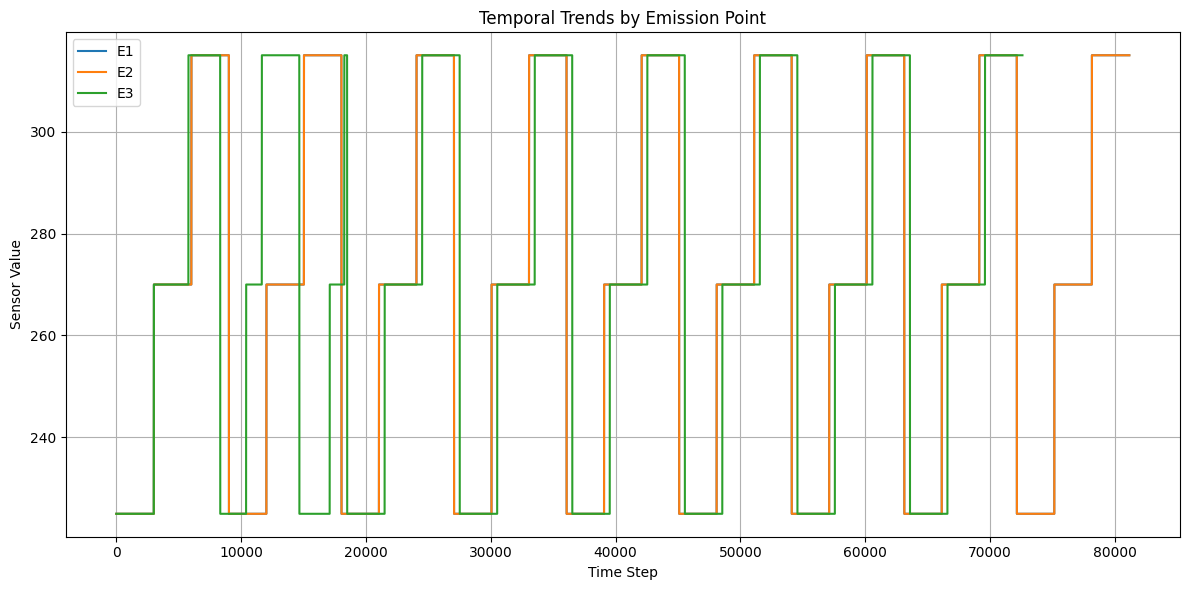

In [4]:
import matplotlib.pyplot as plt

# Plot average particle concentration over time for each Emission_Point
grouped = df.groupby('Emission_Point')
plt.figure(figsize=(12, 6))
for name, group in grouped:
    try:
        # Assume the first sensor column is a representative metric
        col = df.select_dtypes(include='number').columns[0]
        group[col].reset_index(drop=True).plot(label=name)
    except:
        continue
plt.legend()
plt.title("Temporal Trends by Emission Point")
plt.xlabel("Time Step")
plt.ylabel("Sensor Value")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Matriz de correlação entre sensores e parâmetros

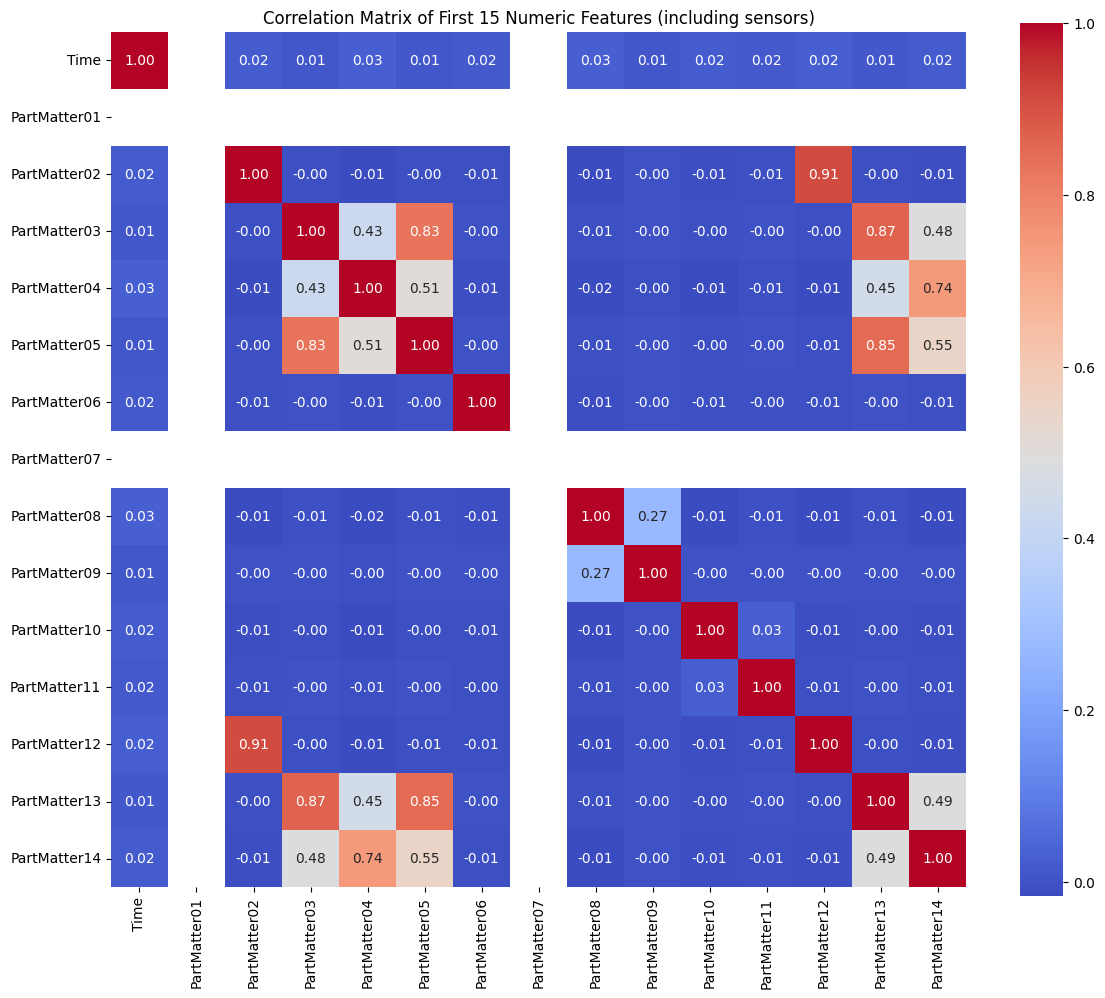

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tentar converter todas as colunas (exceto 'Emission_Point' e 'Subfolder') para numérico
df_numeric = df.drop(columns=['Emission_Point', 'Subfolder'], errors='ignore').apply(pd.to_numeric, errors='coerce')

# Selecionar as 15 primeiras colunas numéricas válidas (após conversão)
valid_numeric_cols = df_numeric.dropna(axis=1, how='all').iloc[:, :15]

# Matriz de correlação
corr = valid_numeric_cols.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix of First 15 Numeric Features (including sensors)")
plt.tight_layout()
plt.show()

## 4. Histogramas e bloxpots para distribuição

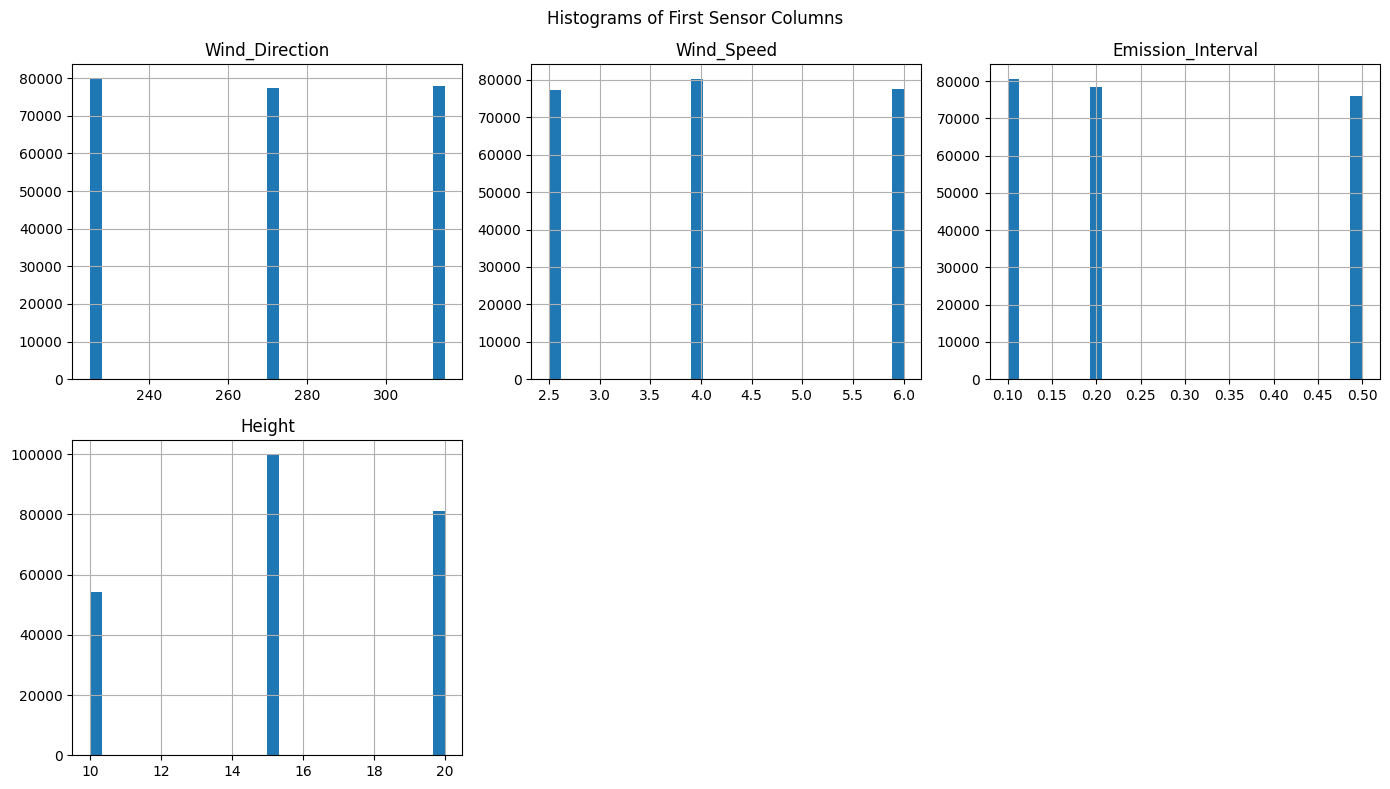

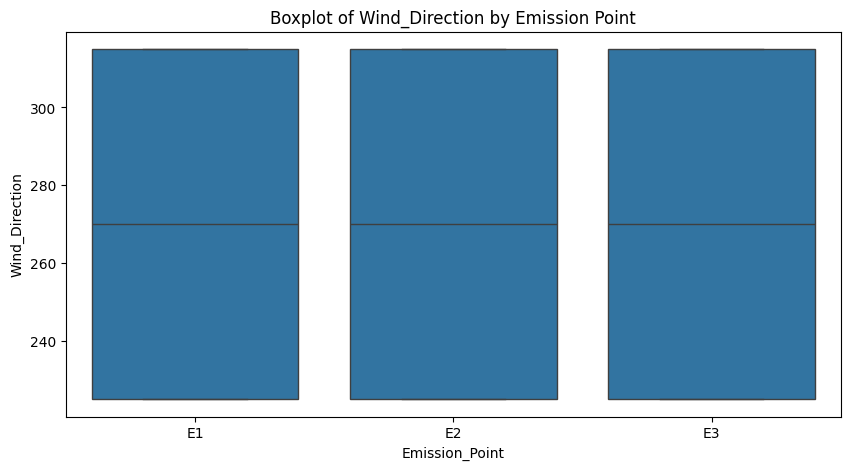

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for first few sensor columns
sensor_cols = df.select_dtypes(include='number').columns[:5]

df[sensor_cols].hist(bins=30, figsize=(14, 8), layout=(2, 3))
plt.suptitle("Histograms of First Sensor Columns")
plt.tight_layout()
plt.show()

# Boxplot for a representative sensor column
plt.figure(figsize=(10, 5))
sns.boxplot(x='Emission_Point', y=sensor_cols[0], data=df)
plt.title(f"Boxplot of {sensor_cols[0]} by Emission Point")
plt.show()


## 5. Analise de componentes principais (PCA)

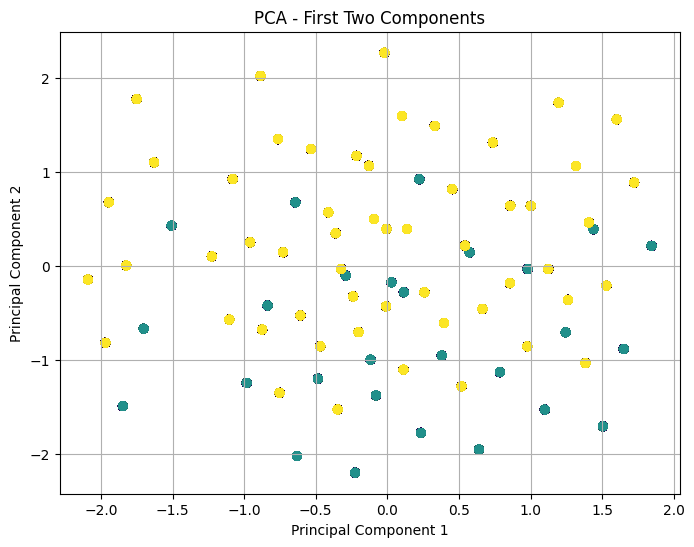

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select only numeric sensor data (excluding metadata)
sensor_data = df.select_dtypes(include='number').dropna()

# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(sensor_data)

# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5, c=pd.factorize(df['Emission_Point'])[0], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Components")
plt.grid(True)
plt.show()
